# Install openai-agents SDK

In [42]:
!pip install -Uq openai-agents

# Make your Notebook capable of running asynchronous functions.
Both Jupyter notebooks and Python’s asyncio library utilize event loops, but they serve different purposes and can sometimes interfere with each other.

The nest_asyncio library allows the existing event loop to accept nested event loops, enabling asyncio code to run within environments that already have an event loop, such as Jupyter notebooks.

In summary, both Jupyter notebooks and Python’s asyncio library utilize event loops to manage asynchronous operations. When working within Jupyter notebooks, it’s essential to be aware of the existing event loop to effectively run asyncio code without conflicts.

In [43]:
import nest_asyncio
nest_asyncio.apply()

# Config

In [44]:
from agents import (
    AsyncOpenAI,
    OpenAIChatCompletionsModel,
)
from google.colab import userdata


In [45]:
gemini_api_key = userdata.get("GEMINI_API_KEY")


# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined in your .env file.")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

In [46]:
from agents import set_default_openai_client, set_tracing_disabled
set_default_openai_client(external_client)
set_tracing_disabled(True)

# Workflow: Parallelization

LLMs can sometimes work simultaneously on a task and have their outputs aggregated programmatically.

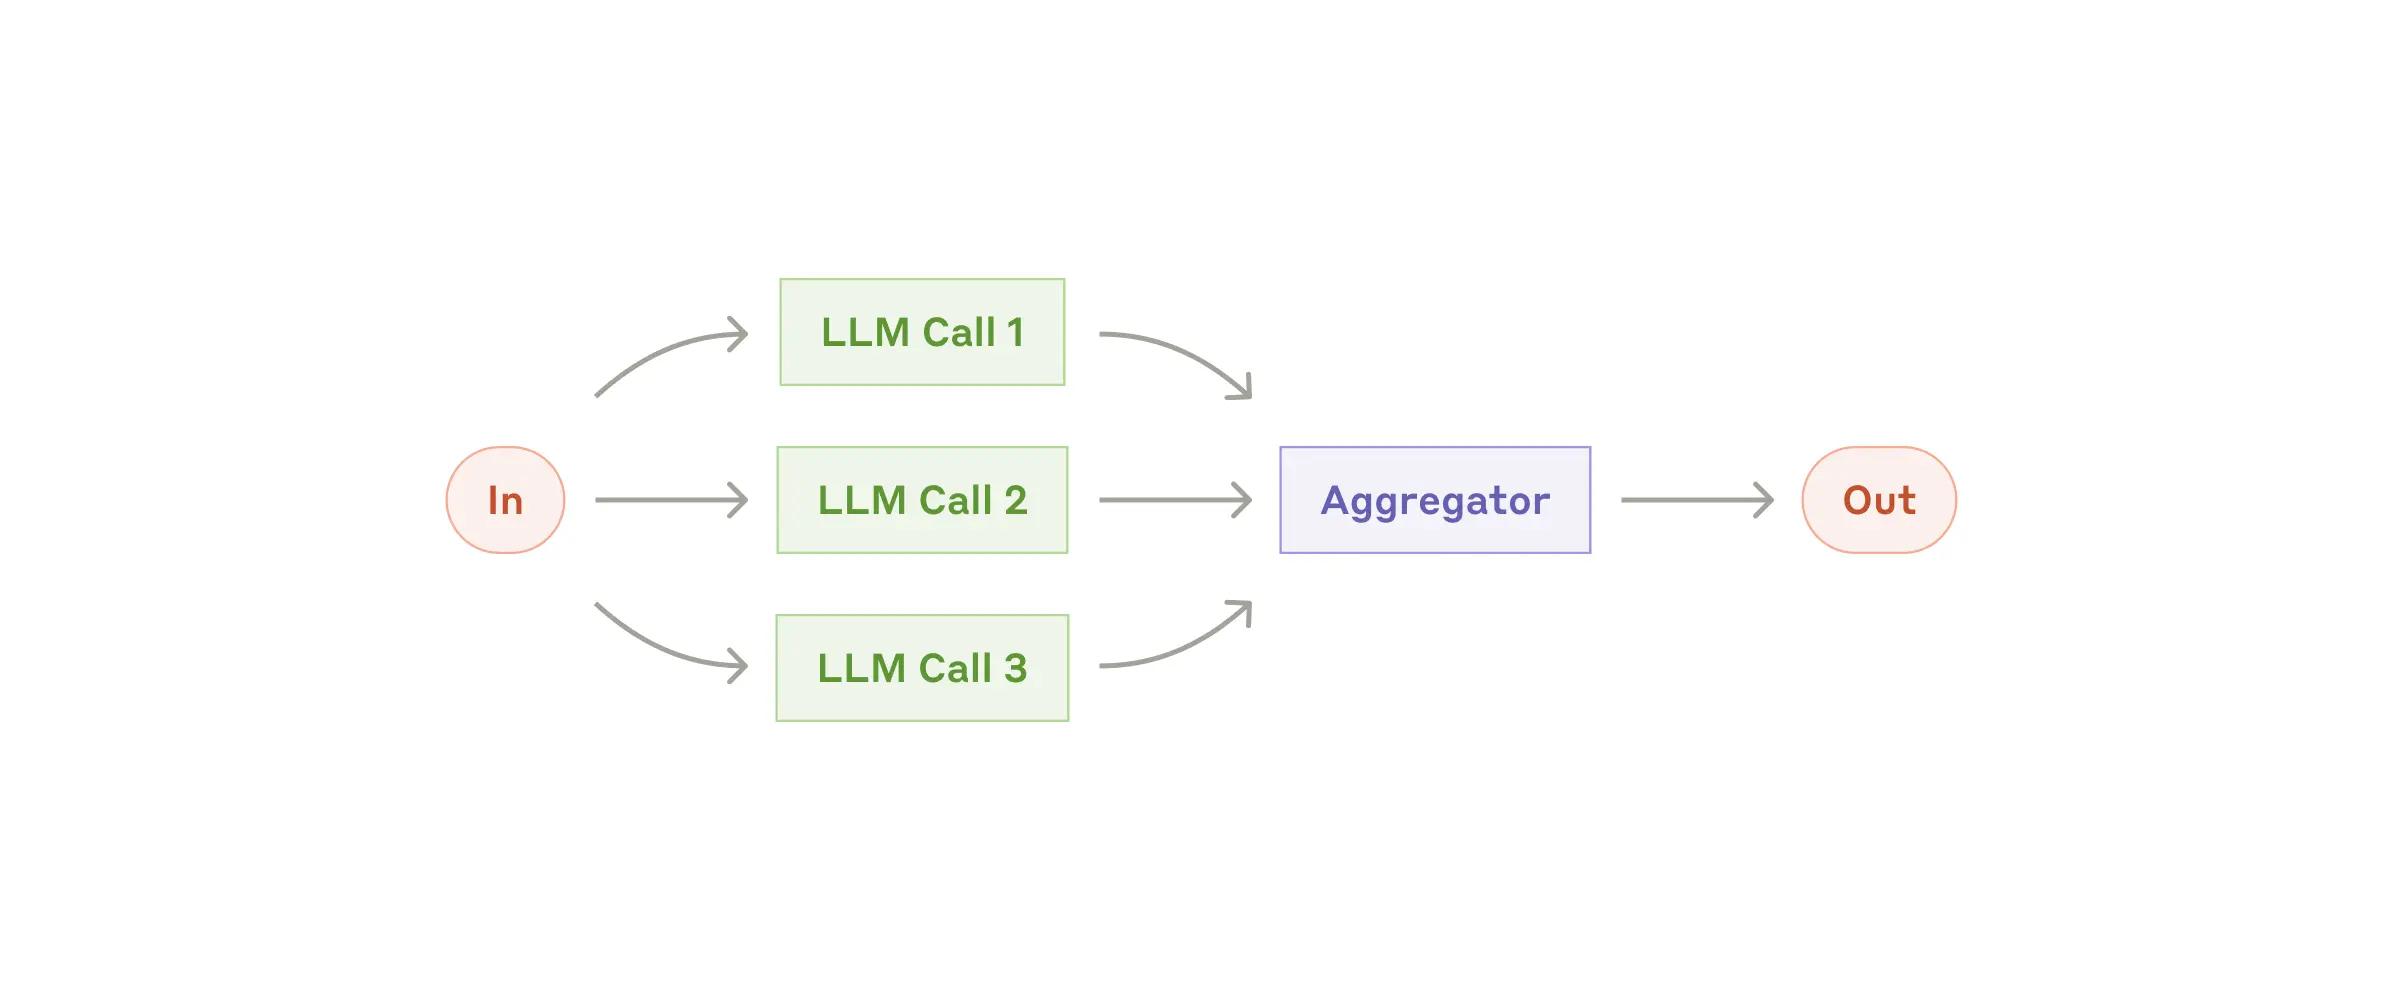

[Learning Reference](https://www.anthropic.com/engineering/building-effective-agents)

In [26]:
# Imports
import asyncio

from agents import Agent, ItemHelpers, Runner

In [49]:
urdu_agent = Agent(
    name="urdu_agent",
    instructions="You translate the user's message to Urdu",
    model=model
)

translation_picker = Agent(
    name="translation_picker",
    instructions="You pick the best Urdu translation from the given options.",
    model=model
)


async def main():
    msg = input("Hi! Enter a message, and we'll translate it to Spanish.\n\n")

    # Ensure the entire workflow is a single trace
    res_1, res_2, res_3 = await asyncio.gather(
        Runner.run(
            urdu_agent,
            msg,
        ),
        Runner.run(
            urdu_agent,
            msg,
        ),
        Runner.run(
            urdu_agent,
            msg,
        ),
    )

    outputs = [
        ItemHelpers.text_message_outputs(res_1.new_items),
        ItemHelpers.text_message_outputs(res_2.new_items),
        ItemHelpers.text_message_outputs(res_3.new_items),
    ]

    translations = "\n\n".join(outputs)
    print(f"\n\nTranslations:\n\n{translations}")

    best_translation = await Runner.run(
        translation_picker,
        f"Input: {msg}\n\nTranslations:\n{translations}",
    )

    print("\n\n-----")

    print(f"Best translation: {best_translation.final_output}")




In [50]:
asyncio.run(main())

Hi! Enter a message, and we'll translate it to Spanish.

What is the Agentic AI and what will it be like at end of this year


Translations:

ایجنٹک اے آئی کیا ہے اور اس سال کے آخر تک یہ کیسا ہو گا؟


Agentic AI کیا ہے اور اس سال کے آخر تک یہ کیسا ہوگا؟


ایجنٹک اے آئی (Agentic AI) کیا ہے اور اس سال کے آخر تک یہ کیسا ہو گا؟



-----
Best translation: The best option is:

**Agentic AI کیا ہے اور اس سال کے آخر تک یہ کیسا ہوگا؟**

Here's why:

*   **Clarity and Simplicity:** It's straightforward and easy to understand.
*   **Correct Spelling:** All words are spelled correctly.
*   **Natural Flow:** The sentence structure is natural for Urdu.

The other options are also acceptable, but this one is slightly cleaner. The third option including "(Agentic AI)" adds unnecessary English when the question is clearly about Agentic AI within the context.

